# Importando database

In [29]:
import numpy as np
import pandas as pd

#  URL del archivo raw de un Gist
# Gist: 'https://gist.github.com/ahcamachod/a572cfcc2527046db93101f88011b26e'
# Adjuntamos ruta 'raw' DE GIST
url = 'https://gist.githubusercontent.com/ahcamachod/a572cfcc2527046db93101f88011b26e/raw/ffb13f45a79d31223e645611a119397dd127ee3c/alquiler.csv'

# Lectura de datos
df = pd.read_csv(url, sep=';') # utilizo ';' ya que segun el dataframe estan separados por ese símbolo.
df.head() # visualizacion solo de las 5 primeras filas


,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN


In [33]:
# Tomamos una muestra aleatoria de 10 filas del dataframe
df.sample(10)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
21383,Departamento,Condesa,3,2,1,220,28000.0,6650.0,18200.0
18567,Conjunto Comercial/Sala,Santa Fe,0,1,0,36,4200.0,2975.0,735.0
20718,Casa,Roma Sur,2,1,0,52,2975.0,NaN,NaN
20615,Casa,San Jerónimo,4,3,1,379,52500.0,4200.0,NaN
15428,Departamento,Santa Fe,5,2,5,330,28000.0,7000.0,17500.0
22032,Conjunto Comercial/Sala,Santa Fe,0,1,0,30,3500.0,2481.5,640.5
12283,Departamento en Hotel,Lomas de Chapultepec,1,1,0,60,19250.0,7105.0,910.0
7583,Departamento,Lomas de Chapultepec,2,1,0,62,10150.0,2800.0,430.5
15023,Departamento,Santa Fe,1,2,0,71,10150.0,4942.0,NaN
5581,Departamento,Coyoacán,4,1,1,350,49000.0,8750.0,NaN


In [34]:
# Verificando el tipo de datos, efectivamente es un dataFrame
type(df)

pandas.core.frame.DataFrame

# First Analysis data exploration

In [35]:
df.sample(5)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
5932,Conjunto Comercial/Sala,Centro Histórico,0,0,0,21,2100.0,1067.5,353.5
4373,Departamento,Santa Fe,1,1,0,56,6300.0,3353.0,NaN
3267,Departamento,Narvarte,4,1,0,230,12250.0,2541.0,441.0
14004,Conjunto Comercial/Sala,Coyoacán,0,1,0,33,12250.0,2761.5,903.0
9172,Departamento,Coyoacán,3,2,1,133,22750.0,8750.0,2208.5


In [36]:
# Verificacion de la cantidad de dimensiones del array
df.shape

(25121, 9)

In [37]:
# Verificamos las etiquetas de las columnas
df.columns

Index(['Tipo', 'Colonia', 'Habitaciones', 'Garages', 'Suites', 'Area', 'Valor',
       'Condominio', 'Impuesto'],
      dtype='object')

In [38]:
# Resumen de los datos analizados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25121 entries, 0 to 25120
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          25121 non-null  object 
 1   Colonia       25121 non-null  object 
 2   Habitaciones  25121 non-null  int64  
 3   Garages       25121 non-null  int64  
 4   Suites        25121 non-null  int64  
 5   Area          25121 non-null  int64  
 6   Valor         25107 non-null  float64
 7   Condominio    22495 non-null  float64
 8   Impuesto      18037 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [39]:
# Verificacion por columna del tipo de dato contenida en ella (columna)
df['Colonia']

0                     Condesa
1                     Polanco
2                    Santa Fe
3            Centro Histórico
4                   Del Valle
                 ...         
25116        Centro Histórico
25117        Centro Histórico
25118                 Mixcoac
25119    Lomas de Chapultepec
25120        Centro Histórico
Name: Colonia, Length: 25121, dtype: object

In [40]:
# Verificación de los tipos de datos de dos columnas
df[['Area','Valor']]  # solamente ['Area','Valor'] es una tupla, se tiene que pasar una lista 

,Area,Valor
0,40,5950.0
1,100,24500.0
2,150,18200.0
3,15,2800.0
4,48,2800.0
...,...,...
25116,755,49000.0
25117,27,2800.0
25118,48,4900.0
25119,70,10500.0


# ML Demands

- Valores promedio de alquiler por tipo de inmueble
- Porcentaje de cada tipo de inmueble presente en la base de datos

In [41]:
# Ver primeras filas
df.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN


In [25]:
# Suma de todos los valores de el dataframe
df['Valor'].mean()

np.float64(36885.05048392878)

In [43]:
print(df.dtypes)

Tipo             object
Colonia          object
Habitaciones      int64
Garages           int64
Suites            int64
Area              int64
Valor           float64
Condominio      float64
Impuesto        float64
dtype: object


In [ ]:
# ¿Cuáles son los valores promedio de alquiler por tipo de propiedad?
df.groupby('Tipo').mean(numeric_only=True) # 'False' por defecto
# 'numeric_only=True : Arg que fuerza el calculo solo en las columnas de tipo numerico

# Muy general, solo veremos la columna de 'VALOR'


,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
Tipo,,,,,,,
Casa,3.359633,1.897248,1.438532,289.943119,31453.177064,3699.421642,6629.404851
Casa Comercial,1.801980,2.118812,0.257426,370.277228,54735.841584,7622.192308,6166.063380
Casa de Condominio,4.319672,3.555738,3.247541,566.303279,51428.609836,5286.578804,15046.939394
Casa de Vecindad,1.974684,0.379747,0.215190,79.981013,5961.740506,413.444444,706.850000
Cochera/Estacionamiento,0.064935,1.376623,0.000000,18.662338,6995.454545,1069.075000,449.458333
Cocineta,0.836088,0.020661,0.041322,29.090909,4425.856061,1521.734214,280.701461
Conjunto Comercial/Sala,0.047175,2.686323,0.000352,236.323711,57675.214550,17489.361142,5425.980245
Departamento,2.504199,1.256367,0.891899,124.014292,18683.269431,6797.092951,2634.921081
Departamento en Hotel,1.419780,0.969231,0.758242,65.848352,16285.430769,7250.650602,1768.923885


In [ ]:
df.groupby('Tipo')['Valor'].mean() 
# Retiramos el valor 'True' porque estamos seleccionando una columna de números (Seria redundante)
# Esta operacion devuelve una serie con la Columna 'Valor' y su Índice 'Tipo'

Tipo
Casa                           31453.177064
Casa Comercial                 54735.841584
Casa de Condominio             51428.609836
Casa de Vecindad                5961.740506
Cochera/Estacionamiento         6995.454545
Cocineta                        4425.856061
Conjunto Comercial/Sala        57675.214550
Departamento                   18683.269431
Departamento en Hotel          16285.430769
Edificio Completo             409418.080645
Estudio                         8400.000000
Galpón/Depósito/Almacén       299984.140138
Hotel                          87500.000000
Industria                     420000.000000
Loft                            9924.526316
Loteo/Condominio               92166.666667
Posada/Chalé                    5180.000000
Rancho                         38014.375000
Terreno Estándar              135364.444444
Tienda en Centro Comercial     32556.785714
Tienda/Salón                   56263.544252
Name: Valor, dtype: float64

In [52]:
# Verificamos el tipo de dato
type(df.groupby('Tipo')['Valor'].mean() )

pandas.core.series.Series

In [51]:
# Esta operacion SI devuelve un dataframe y organizarlos en orden ascendente
df.groupby('Tipo')[['Valor']].mean().sort_values('Valor') 

,Valor
Tipo,
Cocineta,4425.856061
Posada/Chalé,5180.000000
Casa de Vecindad,5961.740506
Cochera/Estacionamiento,6995.454545
Estudio,8400.000000
Loft,9924.526316
Departamento en Hotel,16285.430769
Departamento,18683.269431
Casa,31453.177064


In [53]:
# Verificamos el tipo de dato
type(df.groupby('Tipo')[['Valor']].mean() )

pandas.core.frame.DataFrame

<Axes: ylabel='Tipo'>

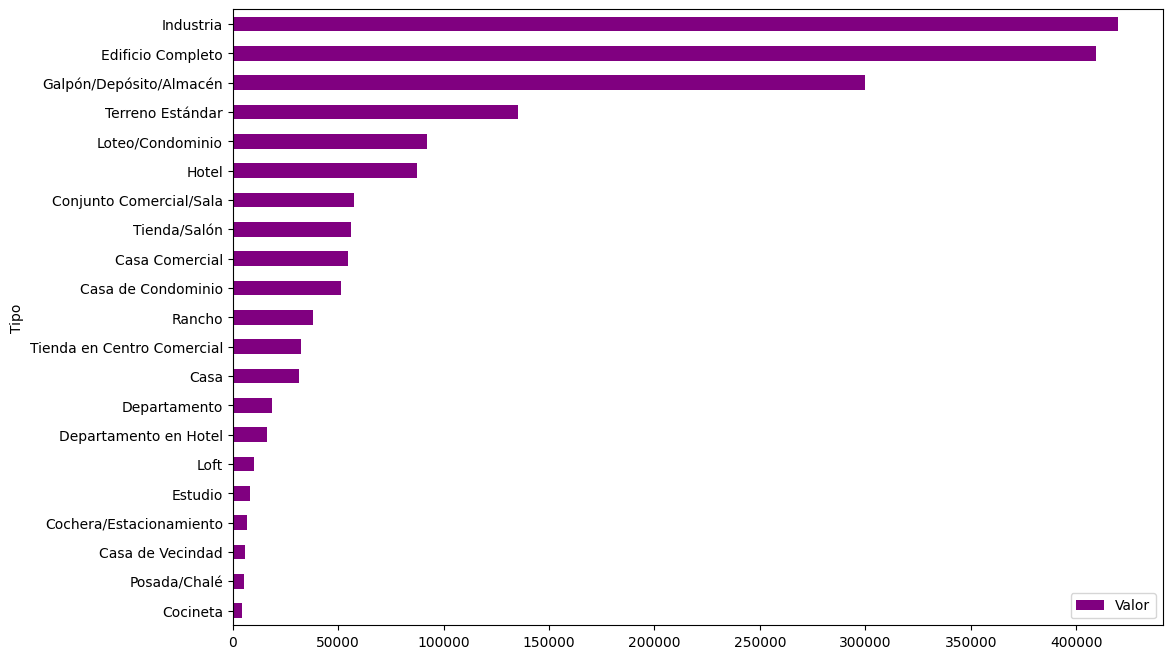

In [ ]:
# Asignamos variable que devuelva un DataFrame con solo dos columnas 
# → df[['Tipo', 'Valor']]
df_tipo_valor = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor') 

# Grafico del DataFrame
df_tipo_valor.plot(kind='barh', figsize=(12,8), color= 'purple')

In [ ]:
# Verificamos las diferentes tipos de inmuebles en la serie 'Tipo'
# solo debemos verificar los inmuebles residenciales.
# df.Tipo.unique() → es similar@
df['Tipo'].unique() 

array(['Cocineta', 'Casa', 'Conjunto Comercial/Sala', 'Departamento',
       'Casa de Condominio', 'Edificio Completo', 'Departamento en Hotel',
       'Tienda/Salón', 'Casa Comercial', 'Casa de Vecindad',
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Rancho',
       'Posada/Chalé', 'Estudio', 'Hotel', 'Loteo/Condominio',
       'Industria'], dtype=object)

In [ ]:
# Asignación de variable para inmuebles comerciales
inmuebles_comerciales = [
    'Conjunto Comercial/Sala', 'Edificio Completo', 'Tienda/Salón',
    'Casa Comercial', 'Terreno Estándar', 'Cochera/Estacionamiento',
    'Galpón/Depósito/Almacén','Tienda en Centro Comercial', 'Hotel',
    'Loteo/Condominio', 'Industria'
]

# Filtramos el dataFrame para tener un dataframe nuevo donde no incluya ('not in') las 
# filas que contengan las entradas que son identicas a las almacenadas en 
# la variable externa 'inmuebles_comerciales' (por ello anteponemos un @)
df.query('@inmuebles_comerciales not in Tipo')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25115,Casa de Condominio,Santa Fe,5,3,4,450,52500.0,5988.5,8162.0
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [64]:
# Generamos un nuevo dataFrame con solo los locales residenciales
new_df = df.query('@inmuebles_comerciales not in Tipo')
new_df.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,NaN,NaN


Generacion de un nuevo gráfico con los valores residenciales utilizando el nuevo dataframe **new_df**
(Utilizamos la info de la celda 22)

<Axes: ylabel='Tipo'>

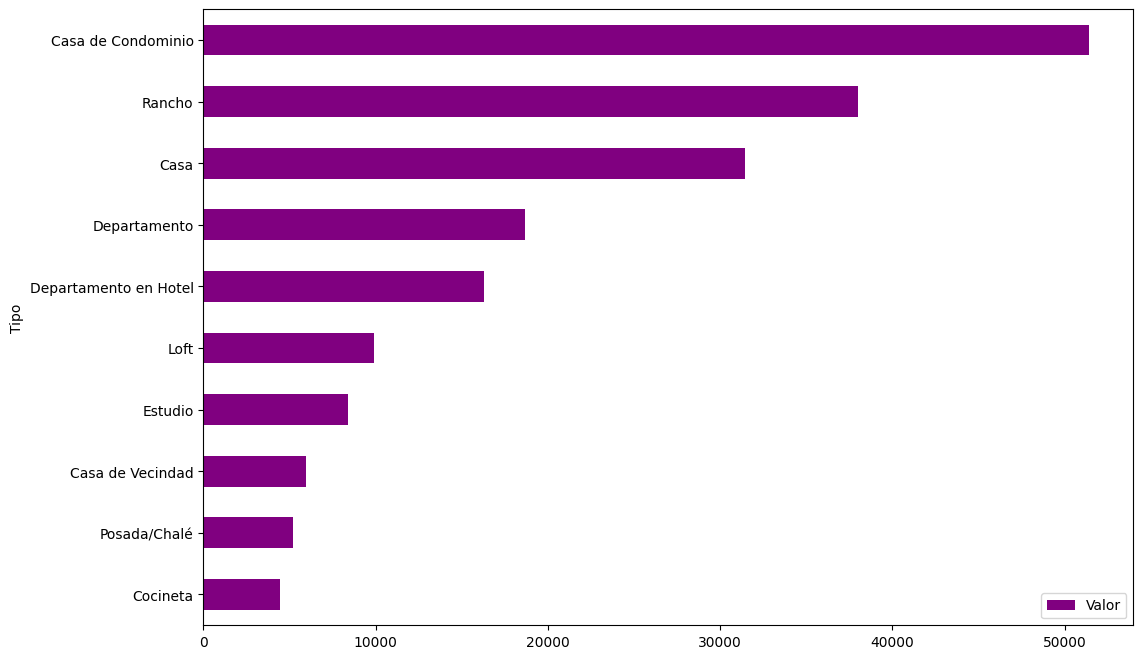

In [66]:
# Asignamos variable que devuelva un DataFrame con solo dos columnas 
# → df[['Tipo', 'Valor']]
df_tipo_valor = new_df.groupby('Tipo')[['Valor']].mean().sort_values('Valor') 

# Grafico del DataFrame
df_tipo_valor.plot(kind='barh', figsize=(12,8), color= 'purple')